<a href="https://colab.research.google.com/github/Zeko2005/cap-comp215/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Project2: Langton's Ant
Name: Ziad Elbadry

Last Updated: 4/1/2024

In [1]:
%matplotlib inline

import time
from pprint import pprint

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
from scipy.signal import correlate2d
import random

# Configure matplotlib's animation library to work in the browser.
matplotlib.rc('animation', html='jshtml')

In [2]:
tab20_mod = matplotlib.colormaps['tab20']
tab20_mod.colors = ((1,1,1,1), *tab20_mod.colors[1:])

def plot_2d_array(array, axes=None, title='', cmap=tab20_mod, **options):
    """
    Plot the 2D array as an image on the given axes  1's will be dark blue, 0's will be light blue.

    :param axes: the axes to plot on, or None to use the `plt.gca()` (current axes)
    :param options: keyword arguments passed directly to `plt.imshow()`
           see https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html
    """
    axes = axes or plt.gca()  # If not axes are provided, draw on current axes
    axes.set_title(title)
    # Turn off axes labels and tick marks
    axes.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False ,
                     labelbottom=False, labeltop=False, labelleft=False, labelright=False,)
    # Defaults for displaying a "matrix" with hard-pixel boundaries and (0,0) at top-left
    options = {**dict(interpolation='nearest', origin='upper'), **options}
    axes.imshow(array, cmap=cmap, **options)

In [3]:
class Animation2D:
    """
      Animates any 2D model with a step() method and a draw() method, using matplotlib
      model.step() should take no parameters - just step the model forward one step.
      model.draw() should take 2 parameters, the matpltolib axes to draw on and an integer step number

      See https://www.allendowney.com/blog/2019/07/25/matplotlib-animation-in-jupyter/
          for a discussion of the pros and cons of various animation techniques in jupyter notebooks
    """

    def __init__(self, model, frames=50, steps_per_frame=1, figsize=(8, 8)):
        """
        :param model: the simulation object to animate, with step() and draw(axes, step) methods
        :param frames: number of animation frames to generate
        """
        self.model = model
        self.frames = frames
        self.steps_per_frame = steps_per_frame
        self.fig, self.ax = plt.subplots(figsize=figsize)

    def animation_step(self, step):
        """ Step the model forward and draw the plot """
        if step > 0:
            for _ in range(self.steps_per_frame):
                self.model.step()
        self.model.draw(self.ax, step=step * self.steps_per_frame)

    def show(self):
        """ return the matplotlib animation object, ready for display """
        anim = animation.FuncAnimation(self.fig, self.animation_step, frames=self.frames)
        plt.close()  # this ensures the last frame is not shown as a separate plot
        return anim

    def animate(self, interval=None):
        """ Animate the model simulation directly in the notebook display block """
        from IPython.display import clear_output
        try:
            for i in range(self.frames):
                clear_output(wait=True)  # clear the IPython display
                self.ax.clear()  # clear old image from the axes (fixes a performance issue)
                plt.figure(self.fig)  # add the figure back to pyplot ** sigh **
                self.animation_step(i)
                plt.show()  # show the current animation frame (pyplot then closes and throws away figure ** sigh **)
                if interval:
                    time.sleep(interval)
        except KeyboardInterrupt:
            pass

##Making an ant class

In [4]:
class Ant:
    """ 2D Cellular Automaton that simulates an Ant digging and undigging the ground """
    # Defines directions and the states of the cells
    NOTDUG = 0
    DUG = 1
    RIGHT = np.array([1,0])
    LEFT = np.array([-1,0])
    UP = np.array([0,1])
    DOWN = np.array([0,-1])
    DIRECTIONS = [RIGHT,UP,LEFT,DOWN]

    # Define a colour map that maps each cell state to an intuitive colour.
    cmap = [(1, 1, 1), (0, 0, 0)]
    cmap[NOTDUG] = (1, 1, 1)  # white
    cmap[DUG] = (0, 0, 0)  # black
    ground_colour_map = matplotlib.colors.ListedColormap(cmap)



    def __init__(self, n, q=0.8):
        """Initializes the model.
        n: number of rows and columns, coordinate specifies where the ant spawns
        , direction is where the ant is facing, state is the ground
        """
        self.coordinate = np.array([int(n/2), int(n/2)])
        self.direction = self.RIGHT
        self.state = np.zeros((n, n))


    def step(self):
        """Executes one time step, applying the CA rules to move the ant and turn it."""
        self.coordinate = self.coordinate + self.direction
        self.state[tuple(self.coordinate)] = (self.state[tuple(self.coordinate)] + 1) % 2
        self.turn()


    def turn(self, p=0.5):
      """Changes the direction of the ant with a probability p."""
      # This code was modified by AI because I faced some errors but I came up with the basic idea

      for i, direction in enumerate(self.DIRECTIONS):
        if np.array_equal(self.direction, direction):
          new_index = (i + 1) % len(self.DIRECTIONS)
          break  # Exit the loop after finding the match

      # Optional: Handle cases where self.direction doesn't match any in DIRECTIONS
      # (This might indicate an error or unexpected state)

      if p >= random.random():
        self.direction = self.DIRECTIONS[new_index]
      else:
        new_index = (new_index - 1) % len(self.DIRECTIONS)
        self.direction = self.DIRECTIONS[new_index]

    def draw(self, axes=None, step=''):
        """Draws the CA cells using the ground colour map so values are coloured intuitively."""
        axes = axes or plt.gca()
        title = f'Ant Land:{step}'
        plot_2d_array(self.state, axes=axes, title=title,
                      cmap=self.ground_colour_map, vmin=0, vmax=len(self.ground_colour_map.colors))

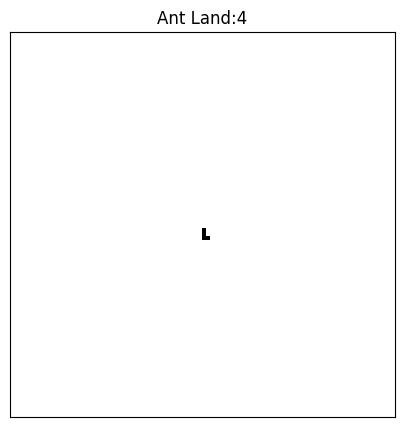

In [5]:
ant1 = Ant(100)
animated = Animation2D(ant1, frames = 1500, figsize=(5, 5))
animated.animate(interval=0.3)